In [1]:
import shapely.geometry as  shp
from shapely.geometry import Polygon, shape, mapping, GeometryCollection
import geojson
import math
import geopandas as gdp
import descartes


In [2]:
# Sample parcel
parcel=Polygon([[-96.8209655,32.9657427],[-96.8205803,32.9657453],[-96.8203764,32.9655743],[-96.8202387,32.9655751],[-96.8201779,32.9656267],[-96.8190891,32.965643],[-96.8190795,32.9665821],[-96.8190844,32.966667],[-96.8190967,32.9667513],[-96.8191163,32.9668347],[-96.8191431,32.9669166],[-96.8191769,32.9669967],[-96.8198674,32.9670017],[-96.8201743,32.9672649],[-96.8211773,32.9672722],[-96.8211686,32.9671324],[-96.8211512,32.9669933],[-96.8211252,32.9668551],[-96.8210907,32.9667182],[-96.8210864,32.9667023],[-96.8210474,32.9665445],[-96.8210159,32.9663855],[-96.8209919,32.9662255],[-96.8209755,32.9660649],[-96.8209667,32.9659039],[-96.8209655,32.9657427]])

In [3]:
# Parcel GeoJson
parcelGeoJson = { "geometry": { "coordinates": [ [ [ -96.8209655, 32.9657427 ], [ -96.8205803, 32.9657453 ], [ -96.8203764, 32.9655743 ], [ -96.8202387, 32.9655751 ], [ -96.8201779, 32.9656267 ], [ -96.8190891, 32.965643 ], [ -96.8190795, 32.9665821 ], [ -96.8190844, 32.966667 ], [ -96.8190967, 32.9667513 ], [ -96.8191163, 32.9668347 ], [ -96.8191431, 32.9669166 ], [ -96.8191769, 32.9669967 ], [ -96.8198674, 32.9670017 ], [ -96.8201743, 32.9672649 ], [ -96.8211773, 32.9672722 ], [ -96.8211686, 32.9671324 ], [ -96.8211512, 32.9669933 ], [ -96.8211252, 32.9668551 ], [ -96.8210907, 32.9667182 ], [ -96.8210864, 32.9667023 ], [ -96.8210474, 32.9665445 ], [ -96.8210159, 32.9663855 ], [ -96.8209919, 32.9662255 ], [ -96.8209755, 32.9660649 ], [ -96.8209667, 32.9659039 ], [ -96.8209655, 32.9657427 ] ] ], "type": "Polygon" }, "properties": { "address": "15950 DALLAS PKWY STE 600", "address2": "blank", "address_source": "county;accuzip", "agval": -9999, "block": "blank", "book": "blank", "call-date": "03/04/2020 - 12:39:44", "careof": "blank", "census_block": "blank", "census_blockgroup": "blank", "census_tract": "blank", "city": "dallas", "county": "dallas", "geoid": "48113", "gisacre": -9999, "improvval": 1340.0, "landval": 0.0, "lbcs_activity": -9999, "lbcs_function": 2000.0, "legaldesc": "blank", "ll_stable_id": "blank", "ll_updated_at": "2019-07-19 10:40:07.520000-04:00", "ll_uuid": "3edd18fe-31f9-4513-841c-bac8ea034a7d", "location_name": "blank", "lot": "blank", "mail_addno": "blank", "mail_addpref": "blank", "mail_address2": "blank", "mail_addstr": "blank", "mail_addstsuf": "blank", "mail_addsttyp": "blank", "mail_city": "DALLAS", "mail_state2": "TX", "mail_unit": "blank", "mail_urbanization": "blank", "mail_zip": "75266", "mailadd": "JEFF MANKOFF PRES PO BOX 660675 90691", "multistruct": -9999, "neighborhood": "N/A", "numstories": -9999, "numunits": -9999, "ogc_fid": 65438, "original_address": "15950 DALLAS PKWY; 600", "owner": "GRAND PASS MGMT", "owner2": "blank", "owner3": "blank", "owner4": "blank", "ownfrst": "blank", "ownlast": "blank", "owntype": "blank", "page": "blank", "parcelnumb": "99972800000074200", "parval": 1340.0, "parvaltype": "assessed", "path": "/us/tx/dallas/dallas/65438", "plat": "blank", "recrdareano": -9999, "recrdareatx": "blank", "reviseddate": "blank", "saddno": "15950", "saddpref": "blank", "saddstr": "DALLAS", "saddstsuf": "blank", "saddsttyp": "PKWY", "saledate": "blank", "saleprice": -9999, "scity": "DALLAS", "source": "openparcel-02", "sourceagent": "blank", "sourcedate": "blank", "sourceref": "blank", "sourceurl": "blank", "sqft": -9999, "state2": "tx", "struct": -9999, "structno": -9999, "structstyle": "blank", "subdivision": "blank", "subowntype": "blank", "subsurfown": "blank", "sunit": "blank", "szip": "75248-6685", "table_name": "tx_dallas", "taxamt": -9999, "urbanization": "blank", "usecode": "3", "usedesc": "BPP", "yearbuilt": -9999, "zoning": "31", "zoning_description": "COMMERCIAL BPP" }, "type": "Feature" }

In [4]:
# parcel bounds
parcel_bounds = list(parcel.bounds)
print(parcel_bounds)

# buffered - parcel bounds
parcel_bounds_buffer = list(parcel.buffer(0.001).bounds) #Approx 100m buffer
print(parcel_bounds_buffer)

[-96.8211773, 32.9655743, -96.8190795, 32.9672722]
[-96.82217671070545, 32.96457431687606, -96.8180795522462, 32.9682721735152]


In [5]:
import math
import time
import json

class Hexbuild:
    """
    Purpose to build hexgrid to cover the extend to an area
    Inputs:
        boundaries (as list = xmin, ymin, xmax, ymax) in decimal degrees
        radius (the hexagon radius) numeric
        units ("kilometers") string
    """
    
    def __init__(self, boundaries, radius, units):
        
        self.boundaries = boundaries
        self.radius = radius
        self.units = units
        
        self.isBoundaries = self._validateBoundaries()
        self.isRadiusValue = self._validateRadius()
        self.isUnitsValue = self._validateUnits()
        
        self.rEarth = 6371.01 # Earth's average radius in km
        self.rEquator = 6378.137 # Earth's radius at equator in km
        self.rPolar = 6356.752 # Earth's radius at poles in km
        
        self.epsilon = 0.000001 # threshold for floating-point equality
        self.pi = 3.14159265358979323846264338327950288419716939937510
        self.center = [] # Stores center point of hexegon
        self._hexgridjson = {} # Stores Hexagon GeoJson
        
        self._hexgrid = self._buildHexGrid() # Executes build hexagon Json
        
        
        
    # Build Hexagon 
    def _buildHexGrid(self):
        
        # Validate inputs into buildHex function
        if self.isBoundaries == True and self.isRadiusValue == True and self.isUnitsValue == True:
            
            # Determine Grid Size
            x_min = self.boundaries[0]
            y_min = self.boundaries[1]
            x_max = self.boundaries[2]
            y_max = self.boundaries[3]
            
            # Calculate radius at latitude
            self.rEarth = math.sqrt(((6378.137**2 * math.cos(y_min))**2 + (6356.752**2 * math.sin(y_min))**2) /
                          ((6378.137 * math.cos(y_min))**2 + (6356.752 * math.sin(y_min))**2))
            
            # Calculate circumference of earth at latitude
            C = 2 * self.pi * self.rEarth
            
            # Calculate number of kilometers in degree of longitude
            M = C / 360
             
            # Unit Conversion
            if self.units == "kilometers":
                self.calcradius = float(self.radius) * 2 / M
            
            # Calculate number of Hexagons required
            x_width = abs(x_min) - abs(x_max) + (self.calcradius*2) 
            y_width = y_max - y_min  + (self.calcradius*2)
            x_cell_count = int(round(x_width/self.calcradius, 0))
            y_cell_count = int(round(y_width/self.calcradius*1.5, 0))
                
            
            # Variable to hold feature collection
            feature_Collection = []
                        
            # Generate hexagon
            self.center.append(self.boundaries[0]) # Position of first Hexagon(X)
            self.center.append(self.boundaries[3]) # Position of first Hexagon(Y)
            
            # Set required variables
            direction = "right"
            count = 1
            x_count = 1
            
            # Loop to create Hexagons and store in GeoJson format
            for y in range(y_cell_count):
            
                for x in range(x_cell_count):

                    hexagon = {
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": self._drawHexagon()
                        },
                        "properties": {
                            "longitude": self.center[0],
                            "latitude": self.center[1],
                            "call-date": str(time.strftime("%m/%d/%Y - %H:%M:%S")),
                            "counter": count
                        }
                    }
                    feature_Collection.append(hexagon)
                    
                    # Increment counters
                    count += 1
                    x_count += 1
                    
                    # Move centroid
                    if x_count <= x_cell_count:
                        offsetDist = self.radius*math.sqrt(3)/2*4
                        if direction == "right":
                            self.center[0] = self._pointRadialDistance(self.center[0], self.center[1], 210, offsetDist)[0]
                        elif direction == "left":
                            self.center[0] = self._pointRadialDistance(self.center[0], self.center[1], 30, offsetDist)[0]
                
                # Reset inner loop counter
                x_count = 1
                
                # Establish next starting row direction and center point
                offsetShift = (self.radius*math.sqrt(3)/2)*2
                if direction == "right":
                    direction = "left"
                    new_center = self._pointRadialDistance(self.center[0], self.center[1], 150, offsetShift)
                
                elif direction == "left":
                    direction = "right"
                    new_center = self._pointRadialDistance(self.center[0], self.center[1], 210, offsetShift)
                
                self.center[0] = new_center[0]
                self.center[1] = new_center[1]
                
            # Collect features collection
            feature_Collection_Frame = { "type": "FeatureCollection", "features": feature_Collection}
            self._hexgridjson = feature_Collection_Frame
            
            return True
            
        else:
            self.error = "Build Hex inputs not correct"
            self._reportError()
            
            return False 
        
    # Draw Hexagon 
    def _drawHexagon(self):
       
        # Need to generate H1 through H6 in counterclockwise direction terminating back at H1
        center_pt = [self.center[0], self.center[1]]
        #print(center_pt)
        h1 = self._pointRadialDistance(self.center[0],self.center[1],60,self.radius)
        h2 = self._pointRadialDistance(self.center[0],self.center[1],120,self.radius)
        h3 = self._pointRadialDistance(self.center[0],self.center[1],180,self.radius)
        h4 = self._pointRadialDistance(self.center[0],self.center[1],240,self.radius)
        h5 = self._pointRadialDistance(self.center[0],self.center[1],300,self.radius)
        h6 = self._pointRadialDistance(self.center[0],self.center[1],360,self.radius)
        
        return [[h1,h2,h3,h4,h5,h6,h1]] # Return hegagon geometry (closed polygon)
     
    """
    Section required to calculate offsets and to generate hexagon geometry
    """
    
    def _deg2rad(self, angle):
        return angle*self.pi/180


    def _rad2deg(self, angle):
        return angle*180/self.pi


    def _pointRadialDistance(self,lon1, lat1, bearing, distance):
        """
        Return final coordinates (lat2,lon2) [in degrees] given initial coordinates
        (lat1,lon1) [in degrees] and a bearing [in degrees] and distance [in km]
        """
        rlat1 = self._deg2rad(lat1)
        rlon1 = self._deg2rad(lon1)
        rbearing = self._deg2rad(bearing)
        rdistance = distance / self.rEarth # normalize linear distance to radian angle

        rlat = math.asin( math.sin(rlat1) * math.cos(rdistance) + 
                         math.cos(rlat1) * math.sin(rdistance) * math.cos(rbearing) )

        if math.cos(rlat) == 0 or abs(math.cos(rlat)) < self.epsilon: # Endpoint a pole
            rlon=rlon1
        else:
            rlon = ( (rlon1 - math.asin( math.sin(rbearing)* math.sin(rdistance) 
                                        / math.cos(rlat) ) + self.pi ) % (2 * self.pi) ) - self.pi

        lat = self._rad2deg(rlat)
        lon = self._rad2deg(rlon)
        return [lon, lat]
    
    """
    Validation Section
    """
    # Validate Boundaries input
    def _validateBoundaries(self):
        if (type(self.boundaries) == list):
            if (len(self.boundaries) == 4):
                for bound in self.boundaries:
                    if isinstance(bound, (int, float)) == False:
                        self.error = "Boundaries contains non-numbers"
                        self._reportError()
                        return False
                return True
            else:
                self.error = "Boundaries requires 4 variables"
                self._reportError()
                return False
        else:
            self.error = "Boundaries is not a list"
            self._reportError()
            return False
    
    # Validate that radius is number
    def _validateRadius(self):
        if isinstance(self.radius, (int, float)) == False:
            self.error = "Radius contains non-numbers"
            self._reportError()
            return False
        return True
    
    # Validate that Radius Units is specified correctly 
    def _validateUnits(self):
        if self.units in ["kilometers"]:
            return True
        self.error = "Radius Units must be kilometers"
        self._reportError()
        return False
            
    # Issue Error Message
    def _reportError(self):
        print(self.error)
    
    """
    Output Section
    """
    # Return GeoJson Results on request as Text
    def sendGeoJsonText(self):
        return json.dumps(self._hexgridjson)
    
    # Return GeoJson Results on request as Dictionary
    def sendGeoJsonDictionary(self):
        return self._hexgridjson

In [6]:
hexgrid = Hexbuild(parcel_bounds, 0.015, "kilometers")
geojson = hexgrid.sendGeoJsonDictionary()
# print(geojson)

# geofile = open(r"c:\temp\testhex.json", "w")
# geofile.write(hexgrid.sendGeoJsonText())
# geofile.close()


In [7]:
# Working with GeoPandas
ParcelDF = gdp.read_file(json.dumps(parcelGeoJson))
HexDF = gdp.read_file(hexgrid.sendGeoJsonText())

In [8]:
# Intersect Clip
IntHexDF = gdp.overlay(HexDF, ParcelDF, how='intersection')
# IntHexDF.head()

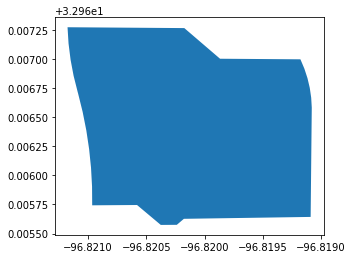

In [12]:
ParcelDF.plot()

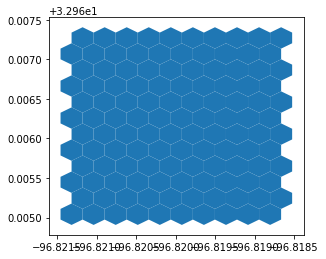

In [10]:
HexDF.plot()

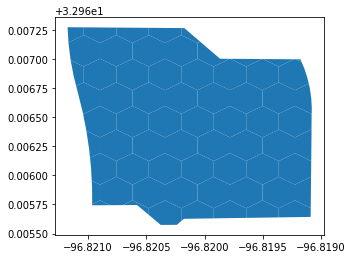

In [11]:
IntHexDF.plot()

In [14]:
IntHexDF.to_file(r"c:\temp\testhex.json", driver='GeoJSON')